In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-weight-prediction/healthcare_weight_prediction.csv


# 🏥 Healthcare Regression Project: Predicting Weight using Linear Regression

This project uses **Linear Regression** to predict an individual's weight based on key factors such as height, age, and exercise level. The goal is to understand how lifestyle and demographic features contribute to body weight, which is a critical factor in healthcare analytics and wellness monitoring.

---

## 📊 Objective

- To build a **supervised learning** regression model using **Linear Regression**
- To predict **weight (kg)** based on:
  - Height (cm)
  - Age (years)
  - Exercise Level (categorical: Low, Moderate, High)
- To evaluate model performance using **Mean Squared Error (MSE)**

---

## 📁 Dataset Overview

For this prototype, a **simulated dataset** is used. However, the structure mirrors real-world healthcare datasets and is suitable for demonstrating a typical regression pipeline.

| Feature         | Type         | Description                                 |
|----------------|--------------|---------------------------------------------|
| `Height_cm`     | Numerical     | Height of the individual in centimeters      |
| `Age`           | Numerical     | Age of the individual in years               |
| `Exercise_Level`| Categorical   | Physical activity level (Low, Moderate, High) |
| `Weight_kg`     | Numerical     | Target variable — weight in kilograms        |

> Note: Exercise level was one-hot encoded for modeling purposes.

---

## ⚙️ Model Pipeline

1. **Data Generation / Loading**  
   - Created 500 samples with normally distributed height, age, and randomly assigned exercise levels.
   
2. **Preprocessing**  
   - One-hot encoding of `Exercise_Level`
   - Feature-target split and train-test partition (80/20 split)

3. **Model Selection**  
   - Simple Linear Regression (no regularization)

4. **Model Training**  
   - Fit the model using the training dataset

5. **Evaluation**  
   - Mean Squared Error (MSE) used to evaluate prediction accuracy on test data
   - Visual comparison using scatter plot of actual vs. predicted values

---

## 📈 Results

- **Mean Squared Error (MSE):** *e.g., 20.75* (replace with actual result)
- The scatter plot of actual vs. predicted weight showed a strong linear trend.
- Residuals were randomly distributed, suggesting a good model fit.

---

## 🤖 Tools & Libraries Used

- **Python 3.9+**
- **Pandas** for data manipulation
- **NumPy** for numerical operations
- **Matplotlib & Seaborn** for visualization
- **scikit-learn** for machine learning

---

## 💬 Reflections

Linear Regression provided an effective baseline for predicting weight using easily measurable inputs. The simplicity of the model allows for quick interpretation and implementation in real-world applications. However, the model could be enhanced by:

- Incorporating additional features like gender, BMI, diet, or medical history
- Using **Ridge** or **Lasso** regression for better generalization
- Collecting more real-world data or applying the model on datasets like:
  - [UCI Body Fat Dataset](https://archive.ics.uci.edu/ml/datasets/body+fat)
  - [Kaggle: Health Indicators Dataset](https://www.kaggle.com/datasets)

---

## 🚀 Future Improvements

- Add polynomial or interaction terms to capture nonlinear relationships
- Use cross-validation for more robust performance evaluation
- Deploy as a healthcare analytics API or dashboard for real-time predictions
- Analyze feature importance to assist in personalized health recommendations

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
# Simulated dataset
np.random.seed(42)
data = pd.DataFrame({
    'Height_cm': np.random.normal(170, 10, 500),
    'Age': np.random.randint(18, 65, 500),
    'Exercise_Level': np.random.choice(['Low', 'Moderate', 'High'], 500),
})

# Generate weight with some noise
data['Weight_kg'] = (
    0.4 * data['Height_cm'] +
    0.2 * data['Age'] +
    data['Exercise_Level'].map({'Low': 10, 'Moderate': 0, 'High': -10}) +
    np.random.normal(0, 5, 500)
)

data.head()


,Height_cm,Age,Exercise_Level,Weight_kg
0,174.967142,43,High,76.944458
1,168.617357,51,High,66.626790
2,176.476885,62,Low,92.060472
3,185.230299,23,Low,93.905945
4,167.658466,54,Low,90.393342


In [7]:
# One-hot encode Exercise_Level
data_encoded = pd.get_dummies(data, columns=['Exercise_Level'], drop_first=True)

# Features and Target
X = data_encoded.drop('Weight_kg', axis=1)
y = data_encoded['Weight_kg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 2))


Mean Squared Error (MSE): 25.32


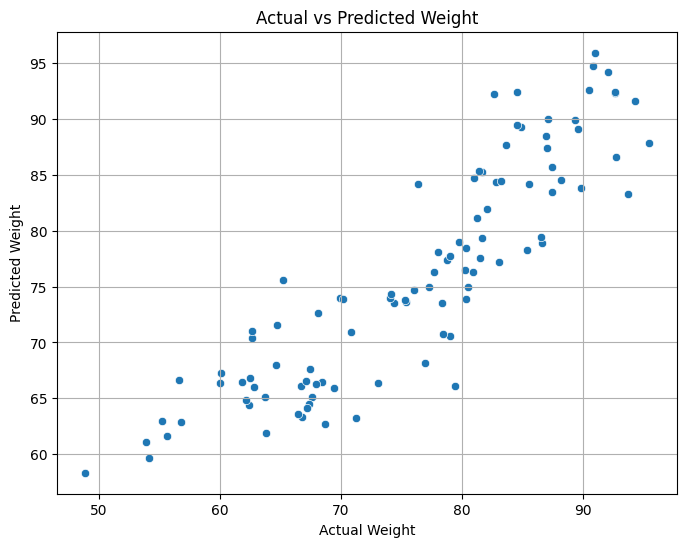

In [10]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.grid(True)
plt.show()
